In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json
from scipy.stats import sem
from os.path import join

In [2]:
# Helper functions
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [39]:
def plot(example_dir,
         save_name,
         dataset_pct=100,
         num_epochs=20,
         save_legend=False,
         dataset=None,
         y_lim=[-0.05, 1.05]):
    
    nsl_repeats_dir = example_dir+'/saved_results'
    nce_repeats_dir = example_dir+'/saved_results'
    
    if dataset is not None:
        nsl_repeats_dir = nsl_repeats_dir+'/repeats/'+dataset
        nsl_no_corrective_ex_repeats_dir = nce_repeats_dir+'/no_corrective_ex_repeats/'+dataset
    else:
        nsl_repeats_dir = nsl_repeats_dir+'/repeats'
        nsl_no_corrective_ex_repeats_dir = nce_repeats_dir+'/no_corrective_ex_repeats'

    
    # We plot mean accuracy per epoch alongside standard error of the mean
    # Get NSL results
    nsl_means = []
    nsl_errs = []
    nsl_dir = nsl_repeats_dir+'/'+str(dataset_pct)
    repeats = os.listdir(nsl_dir)
    repeats = [r for r in repeats if r != '.DS_Store']
    repeats.sort(key=natural_keys)
    
    # X data is just epoch number
    full_range = num_epochs + 1
    X = list(range(full_range))
    
    for epoch_num in range(full_range):
        all_results_epoch = []
        for idx, i in enumerate(repeats):
            # Read in test_log and get end-to-end accuracy at this epoch
            with open(join(nsl_dir, i, 'test_log.json'), 'r') as jf:
                tl = json.loads(jf.read())
                acc = tl[str(epoch_num)]['end_to_end_acc']
                all_results_epoch.append(acc)
            
        # Compute mean and std err across all repeats
        nsl_means.append(np.mean(all_results_epoch))
        nsl_errs.append(sem(all_results_epoch))
        
    # Get no corrective ex results
    nce_means = []
    nce_errs = []
    nce_dir = nsl_no_corrective_ex_repeats_dir+'/'+str(dataset_pct)
    nce_repeats = os.listdir(nce_dir)
    nce_repeats = [r for r in nce_repeats if r != '.DS_Store']
    nce_repeats.sort(key=natural_keys)
    
    # X data is just epoch number
    full_range = num_epochs + 1
    X = list(range(full_range))
    
    for epoch_num in range(full_range):
        all_results_epoch = []
        for idx, i in enumerate(nce_repeats):
            # Read in test_log and get end-to-end accuracy at this epoch
            with open(join(nce_dir, i, 'test_log.json'), 'r') as jf:
                tl = json.loads(jf.read())
                acc = tl[str(epoch_num)]['end_to_end_acc']
                all_results_epoch.append(acc)
            
        # Compute mean and std err across all repeats
        nce_means.append(np.mean(all_results_epoch))
        nce_errs.append(sem(all_results_epoch))
    
    # Plot graph
    figure_handles = []
    figure_labels = []
    fig = plt.figure("data figure")
    legend_fig = plt.figure("legend figure")
    ax = fig.add_subplot(111)
    nsl_plot, = ax.plot(X, nsl_means, color="k")
    figure_handles.append(nsl_plot)
    figure_labels.append('NSIL')
    ax.errorbar(X, nsl_means, nsl_errs, color="k", capsize=5)
    
    # No corrective examples
    nce_plot, = ax.plot(X, nce_means, color="r", linestyle=':')
    figure_handles.append(nce_plot)
    figure_labels.append('NSIL Without Corrective Examples')
    ax.errorbar(X, nce_means, nce_errs, color="r", linestyle=':', capsize=5)
    
    
    
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_xticks(X)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.grid(which='both')
    ax.set_ylim(y_lim)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    
    base_dir = '../figures/no_corrective_ex/'
    if save_legend:
        legend_fig.legend(figure_handles, figure_labels, loc='center', ncol=2)
        legend_fig.savefig(base_dir+save_name, bbox_inches='tight')
    else:
        fig.savefig(base_dir+save_name, bbox_inches='tight')

# Figures

## Sum

In [40]:
# Example directory
example_name = 'arithmetic'
dataset = 'sum'
example = '../../../examples/'+example_name

In [41]:
%%capture
plot(example, save_name='arithmetic_legend.pdf', save_legend=True, dataset=dataset)

### 100% Training Data

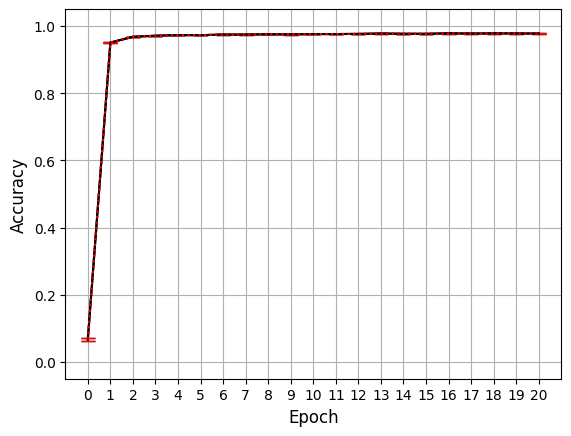

<Figure size 640x480 with 0 Axes>

In [32]:
plot(example, save_name=f'{example_name}_{dataset}_100_pct.pdf', dataset=dataset)

### 10% Training Data

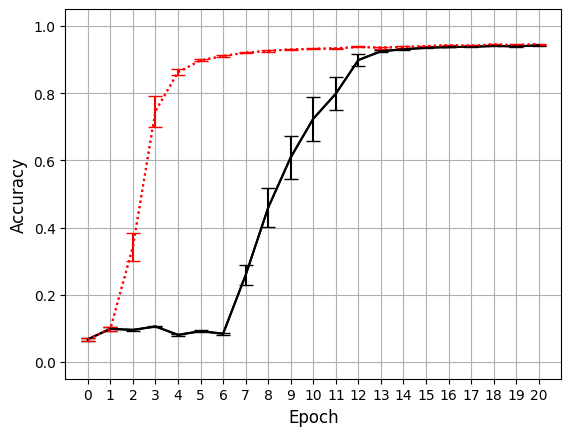

<Figure size 640x480 with 0 Axes>

In [33]:
plot(example, dataset_pct=10, save_name=f'{example_name}_{dataset}_10_pct.pdf', dataset=dataset)

### 5% Training Data

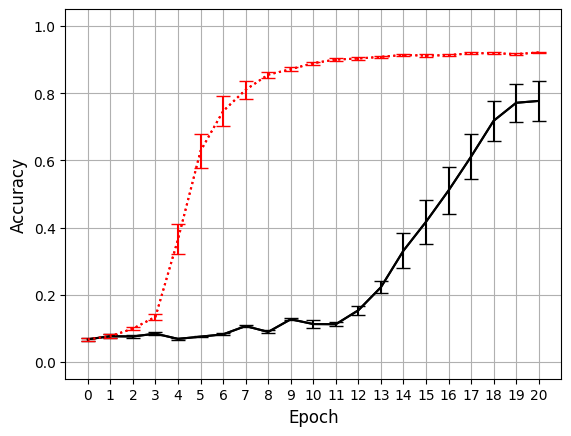

<Figure size 640x480 with 0 Axes>

In [34]:
plot(example, dataset_pct=5, save_name=f'{example_name}_{dataset}_5_pct.pdf', dataset=dataset)

## E9P

In [35]:
dataset = 'e9p'

### 100% Training Data

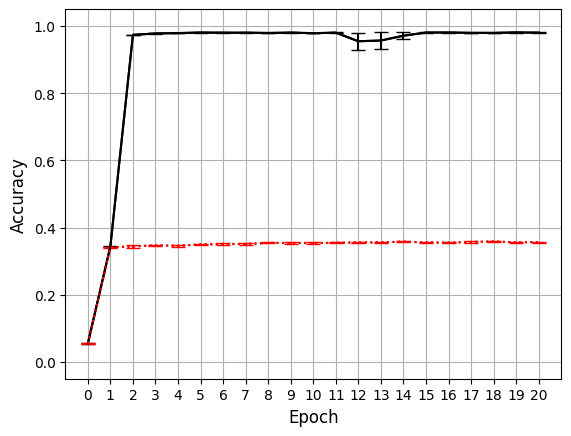

<Figure size 640x480 with 0 Axes>

In [36]:
plot(example, save_name=f'{example_name}_{dataset}_100_pct.pdf', dataset=dataset)

### 10% Training Data

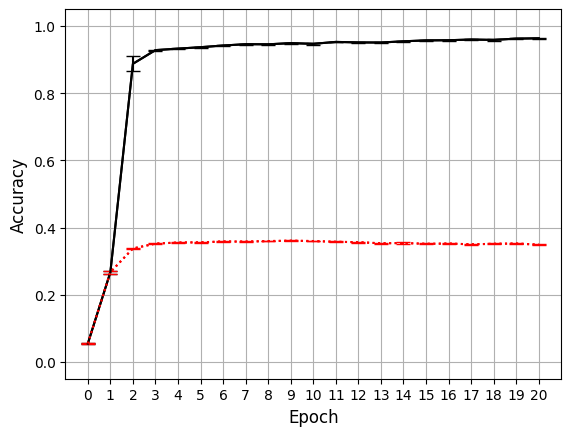

<Figure size 640x480 with 0 Axes>

In [37]:
plot(example, dataset_pct=10, save_name=f'{example_name}_{dataset}_10_pct.pdf', dataset=dataset)

### 5% Training Data

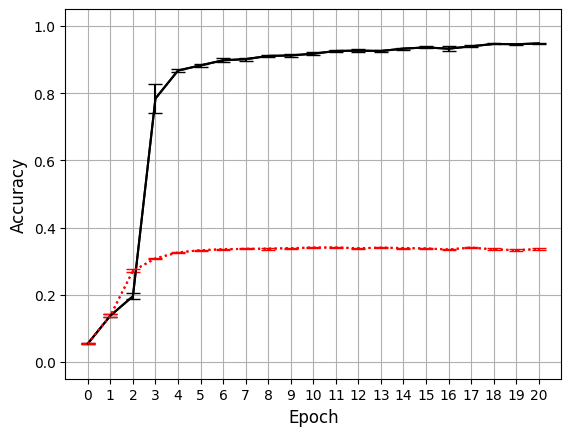

<Figure size 640x480 with 0 Axes>

In [38]:
plot(example, dataset_pct=5, save_name=f'{example_name}_{dataset}_5_pct.pdf', dataset=dataset)

## HS

In [42]:
# Example directory
example_name = 'hitting_sets'
example = '../../../examples/'+example_name

### Legend

In [43]:
%%capture
plot(example, save_name='hs_legend.pdf', save_legend=True, dataset='HS_mnist')

### MNIST

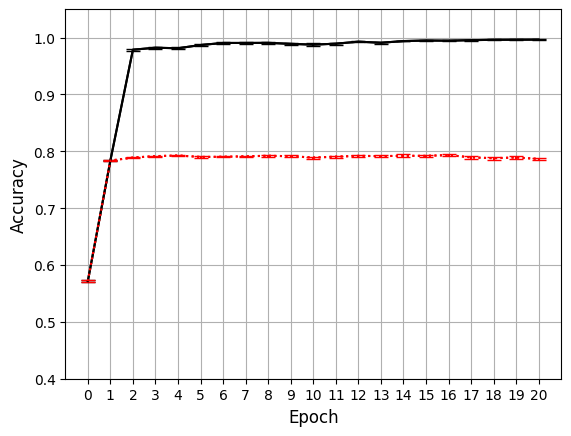

<Figure size 640x480 with 0 Axes>

In [20]:
plot(example, save_name=f'HS_mnist.pdf', dataset='HS_mnist', y_lim=[0.4, 1.05])

### FashionMNIST

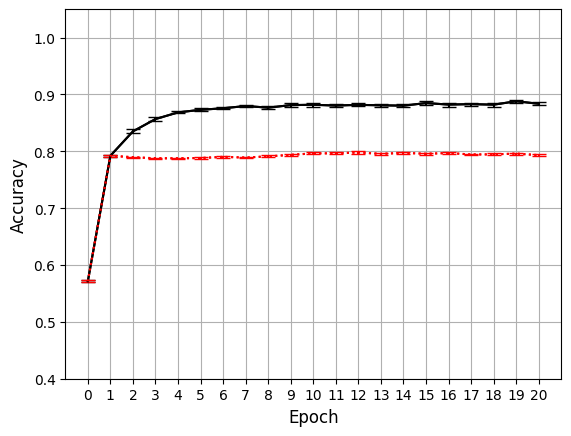

<Figure size 640x480 with 0 Axes>

In [21]:
plot(example, save_name=f'HS_fashion_mnist.pdf', dataset='HS_fashion_mnist', y_lim=[0.4, 1.05])

## CHS

### MNIST

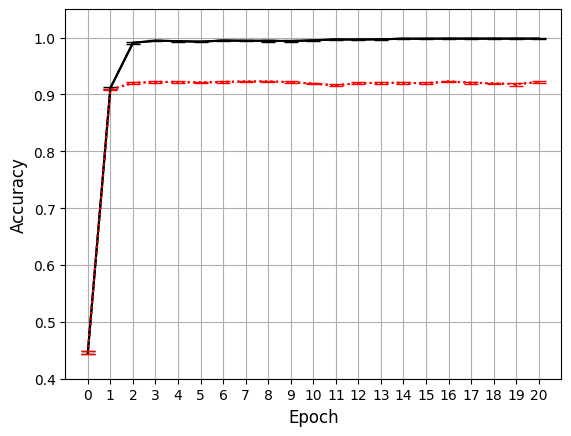

<Figure size 640x480 with 0 Axes>

In [22]:
plot(example, save_name=f'CHS_mnist.pdf', dataset='CHS_mnist', y_lim=[0.4, 1.05])

### FashionMNIST

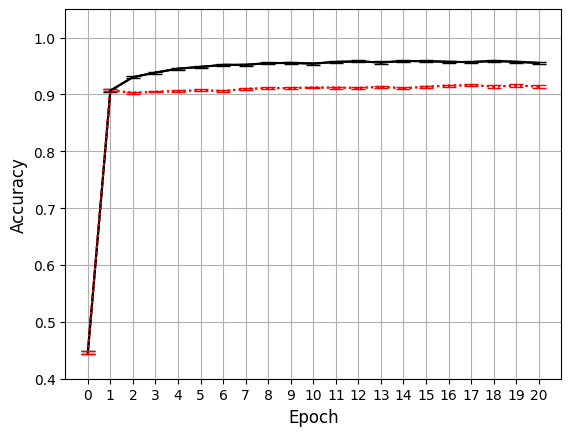

<Figure size 640x480 with 0 Axes>

In [23]:
plot(example, save_name=f'CHS_fashion_mnist.pdf', dataset='CHS_fashion_mnist', y_lim=[0.4, 1.05])